In [14]:
import pandas as pd # a library that works with data analysis and manipulation.

df = pd.read_csv(r"C:\Users\v564k261\Downloads\linear_data_v1.csv") # read in the file

x = df["x"].to_numpy() # call a column of values into an array
noisy_y = df["noisy_y"].to_numpy()
y_error = df["y_error"].to_numpy()

print("x:", x)          # print them 
print("noisy_y:", noisy_y)
print("y_error:", y_error)


x: [ 0.          0.34482759  0.68965517  1.03448276  1.37931034  1.72413793
  2.06896552  2.4137931   2.75862069  3.10344828  3.44827586  3.79310345
  4.13793103  4.48275862  4.82758621  5.17241379  5.51724138  5.86206897
  6.20689655  6.55172414  6.89655172  7.24137931  7.5862069   7.93103448
  8.27586207  8.62068966  8.96551724  9.31034483  9.65517241 10.        ]
noisy_y: [ 1.73605093  3.6616867   1.18057784  2.61023171  5.95986212  4.19414535
  5.81784632  4.36012847  6.61494503  8.40938074  9.93824473  9.58053307
  7.66677883 11.16271344 12.60027543 11.27176999 12.40007799 13.95308359
 13.38008213 16.07981481 14.14410793 14.17439339 10.04492371 17.43086475
 17.06932898 18.40780478 21.25215536 21.33588224 19.68045291 23.41451091]
y_error: [1.60423822 1.94254136 1.06175292 0.31294443 1.58832935 2.17775318
 0.50906212 1.14346873 0.92035736 1.64063992 2.00403526 2.86596018
 2.10636437 2.72173848 1.84885394 0.6376689  0.91616065 2.87629562
 1.50697538 2.99815586 0.3878733  0.91907335 2

Slope: 1.9739
Intercept: 1.4481


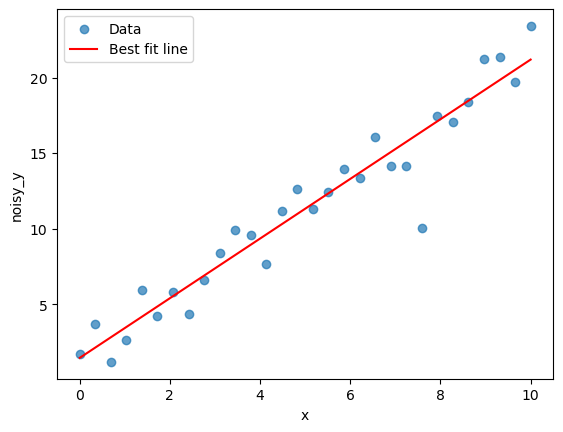

In [5]:
import numpy as np # a library for scientific computing on the arrays 
import pandas as pd
import matplotlib.pyplot as plt # for plotting 

# Load the data
df = pd.read_csv(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")

x = df["x"].to_numpy()# change into array
y = df["noisy_y"].to_numpy()

# Fit a first-degree polynomial (line)
slope, intercept = np.polyfit(x, y, 1) # NUMPY.Polyfit inbuilt-function that gives a slope and an intercept


print(f"Slope: {slope:.4f}") # print the slope and the intercept
print(f"Intercept: {intercept:.4f}")

# Plot the data and fit
plt.scatter(x, y, label="Data", alpha=0.7)
plt.plot(x, slope*x + intercept, color="red", label="Best fit line")
plt.xlabel("x")
plt.ylabel("noisy_y")
plt.legend()
plt.show()

Slope (weighted): 2.0011
Intercept (weighted): 0.6525


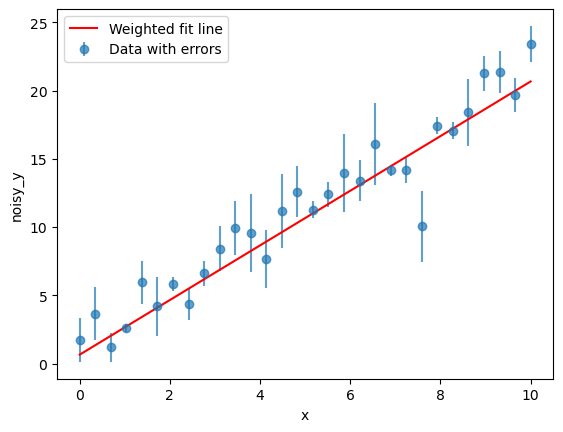

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")

x = df["x"].to_numpy()
y = df["noisy_y"].to_numpy()
yerr = df["y_error"].to_numpy()

# Weighted fit (degree 1 polynomial)
slope, intercept = np.polyfit(x, y, 1, w=1/yerr**2) # weighted = 1/ (yerr)^2

print(f"Slope (weighted): {slope:.4f}")
print(f"Intercept (weighted): {intercept:.4f}")

# Plot
plt.errorbar(x, y, yerr=yerr, fmt='o', label="Data with errors", alpha=0.7) # fmt = shape of the error bar, alpha for transparency of the error bar lines
plt.plot(x, slope*x + intercept, 'r-', label="Weighted fit line") # 'r-' red solid line
plt.xlabel("x")
plt.ylabel("noisy_y")
plt.legend()
plt.show()


In [10]:
import numpy as np

def weighted_linear_fit(x, y, yerr):
   
    # Fit with weights and get covariance matrix
    coeffs, cov = np.polyfit(x, y, 1, w=1/yerr, cov=True)
    slope, intercept = coeffs
    
    # Errors
    slope_err = np.sqrt(cov[0, 0])
    intercept_err = np.sqrt(cov[1, 1])
    
    # Define the best-fit line as a function
    def fit_func(x_val):
        return slope * x_val + intercept
    
    return slope, intercept, slope_err, intercept_err, fit_func

import pandas as pd

# Load data
df = pd.read_csv(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")
x = df["x"].to_numpy()
y = df["noisy_y"].to_numpy()
yerr = df["y_error"].to_numpy()

slope, intercept, slope_err, intercept_err, y_fit = weighted_linear_fit(x, y, yerr)

print(f"Slope = {slope:.3f} ± {slope_err:.3f}")
print(f"Intercept = {intercept:.3f} ± {intercept_err:.3f}")



Slope = 2.023 ± 0.057
Intercept = 0.802 ± 0.309
Prediction at x=5: 10.918407385497344


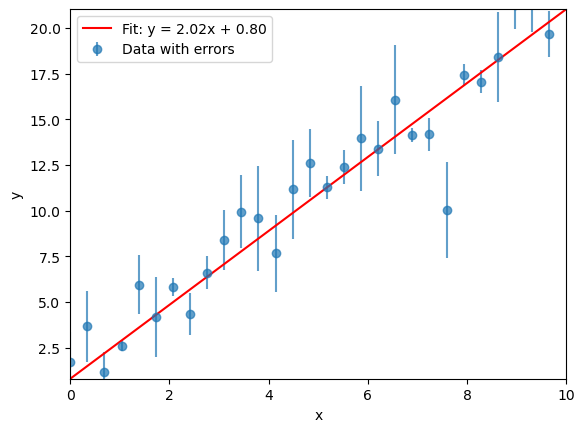

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def weighted_linear_fit(x, y, yerr):
    """Weighted linear fit that returns slope, intercept, uncertainties, and a fit function."""
    coeffs, cov = np.polyfit(x, y, 1, w=1/yerr, cov=True)
    slope, intercept = coeffs
    slope_err = np.sqrt(cov[0, 0])
    intercept_err = np.sqrt(cov[1, 1])

    def fit_func(x_val):
        return slope * x_val + intercept

    return slope, intercept, slope_err, intercept_err, fit_func


# ---- Load your data ----
df = pd.read_csv(r"C:\Users\v564k261\Downloads\linear_data_v1.csv")
x = df["x"].to_numpy()
y = df["noisy_y"].to_numpy()
yerr = df["y_error"].to_numpy()

# ---- Fit ----
slope, intercept, slope_err, intercept_err, y_fit = weighted_linear_fit(x, y, yerr)

# ---- Plot ----
# Create smooth x values for plotting the fit
x_fit = np.linspace(min(x), max(x), 200)
y_fit_vals = y_fit(x_fit)

plt.errorbar(x, y, yerr=yerr, fmt='o', label="Data with errors", alpha=0.7)
plt.plot(x_fit, y_fit_vals, 'r-', label=f"Fit: y = {slope:.2f}x + {intercept:.2f}")

# Set axis limits as requested
plt.xlim(min(x), max(x))
plt.ylim(min(y_fit_vals), max(y_fit_vals))

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()


In [ ]:
# astro tables 
